In [2]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from sodapy import Socrata


client = Socrata("data.cityofnewyork.us", None)
results = client.get("43nn-pn8j", limit=20000)
results_df = pd.DataFrame.from_records(results)
results_df.count()

action                   20000
boro                     20000
building                 19949
camis                    20000
critical_flag            20000
cuisine_description      20000
dba                      20000
grade                    10556
grade_date               10556
inspection_date          20000
inspection_type          20000
phone                    20000
record_date              20000
score                    19248
street                   20000
violation_code           19763
violation_description    19672
zipcode                  19591
dtype: int64

In [7]:
results_df.to_csv('Outputs/smallpractice_data.csv', index=True)

# Step 1: Drop useless columns 

In [8]:
results_df.columns

Index(['action', 'boro', 'building', 'camis', 'critical_flag',
       'cuisine_description', 'dba', 'grade', 'grade_date', 'inspection_date',
       'inspection_type', 'phone', 'record_date', 'score', 'street',
       'violation_code', 'violation_description', 'zipcode'],
      dtype='object')

In [9]:
newresultsdf= results_df.drop(columns=['camis','building','grade_date','violation_description'])

In [10]:
newresults2 = newresultsdf.drop(columns=['inspection_type','phone','record_date','score','violation_code','street'])

In [11]:
newresults2.to_csv('Outputs/small_practice_cleaned_data.csv', index=True)
newresults2.head()

newresults2.columns

Index(['action', 'boro', 'critical_flag', 'cuisine_description', 'dba',
       'grade', 'inspection_date', 'zipcode'],
      dtype='object')

In [12]:
#clean data: change column headings, add index, fix timestamp to YYMMDD, Add Inspection Bins per year
#combine cuisines if desired?


In [13]:
# Bar Graph 1: count of most popular restaurants names
# groupby dba, bargraph with top 10 counted restaurant names
# delete null values in restaurant names

In [14]:
countboro = newresults2["boro"].value_counts()
countboro

MANHATTAN        10170
QUEENS            4130
BROOKLYN          3282
BRONX             1299
STATEN ISLAND     1119
Name: boro, dtype: int64

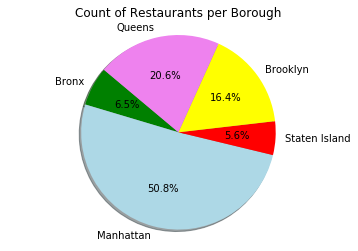

<Figure size 432x288 with 0 Axes>

In [3]:
# BarGraph 2: count of restaurants per borough
# delete restaurants that don't have an assigned borough

labels = "Bronx","Manhattan","Staten Island","Brooklyn","Queens"
sizes = [1299, 10170, 1119, 3282, 4130]
colors = ["green","lightblue","red","yellow","violet"]
explode = (0, 0, 0, 0,0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Count of Restaurants per Borough")
plt.axis('equal')
plt.show()

plt.savefig('Count_restaurants.png') 

In [5]:
cusinecount = newresults2["cuisine_description"].value_counts()
cusinecount

NameError: name 'newresults2' is not defined

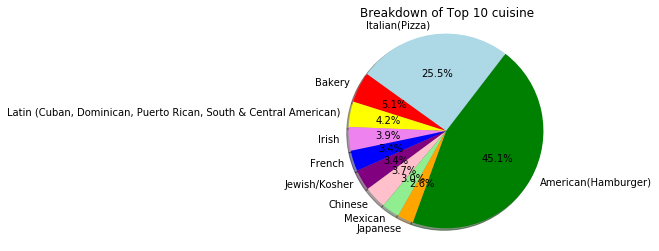

<Figure size 432x288 with 0 Axes>

In [9]:

labels = "American(Hamburger)","Italian(Pizza)", "Bakery", "Latin (Cuban, Dominican, Puerto Rican, South & Central American)", "Irish","French","Jewish/Kosher", "Chinese","Mexican","Japanese"

sizes = [7182, 4059,805, 669,626,546,546,595,471, 416]

colors = ["green","lightblue","red","yellow","violet", "blue","purple","pink","lightgreen","orange"]
explode = (0, 0, 0, 0,0,0, 0, 0, 0,0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=250)
plt.title("Breakdown of Top 10 cuisine")
plt.axis('equal')
plt.show()

plt.savefig('top10.png') 

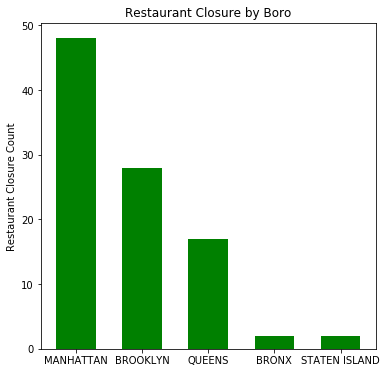

In [10]:
# Closures by Boro
ClosuresBoro = results_df[results_df['action'].str.contains('losed by DOHMH')]
ClosuresBoro = ClosuresBoro.drop_duplicates(subset=['zipcode','boro','dba','cuisine_description','phone','street'])
TotalClosures = len(ClosuresBoro)

ClosuresBoro = ClosuresBoro.groupby("boro").agg({'boro':'count'})
ClosuresBoro = ClosuresBoro.rename(columns = {"boro" : "ClosuresBoroCount"})

ClosuresBoro = ClosuresBoro.reset_index(level=['boro'])
ClosuresBoro.head(5)

ClosuresBoro = ClosuresBoro.sort_values(by='ClosuresBoroCount',ascending=False)

ClosuresBoro.head()
# plot the bar chart
chartSize = 6
fig, ax = plt.subplots(figsize = (chartSize,chartSize))
zz_chart5 = plt.bar(ClosuresBoro['boro'].values,
                   ClosuresBoro['ClosuresBoroCount'].values,
                   color='Green',width=0.6)

plt.ylabel("Restaurant Closure Count")
plt.title("Restaurant Closure by Boro")

plt.savefig('Restaurant_Closure_by_Boro.png')

plt.show()

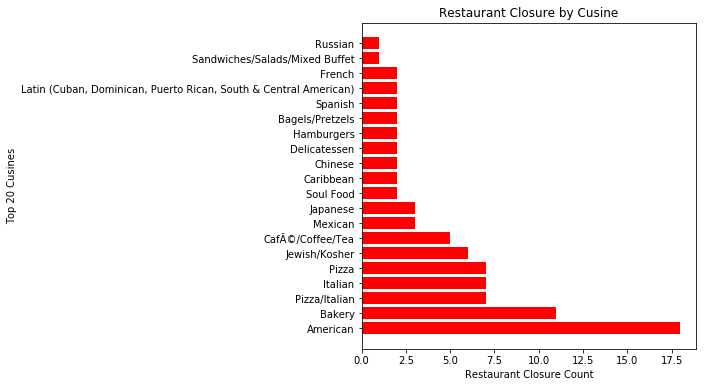

In [12]:
# Closures by Boro
ClosuresBoro = results_df[results_df['action'].str.contains('losed by DOHMH')]
ClosuresBoro = ClosuresBoro.drop_duplicates(subset=['zipcode','boro','dba','cuisine_description','phone','street'])
TotalClosures = len(ClosuresBoro)

ClosuresBoro = ClosuresBoro.groupby("cuisine_description").agg({'cuisine_description':'count'})
ClosuresBoro = ClosuresBoro.rename(columns = {"cuisine_description" : "ClosuresCusineCount"})

ClosuresBoro = ClosuresBoro.reset_index(level=['cuisine_description'])

ClosuresBoro = ClosuresBoro.sort_values(by='ClosuresCusineCount',ascending=False)
ClosuresBoro= ClosuresBoro[:20]
#ClosuresBoro

# plot the bar chart
chartSize = 6
fig, ax = plt.subplots(figsize = (chartSize,chartSize))
zz_chart5 = plt.barh(ClosuresBoro['cuisine_description'].values,
                   ClosuresBoro['ClosuresCusineCount'].values,
                   color='red')

plt.ylabel("Top 20 Cusines")
plt.xlabel("Restaurant Closure Count")
plt.title("Restaurant Closure by Cusine")

plt.savefig('Restaurant_Closure_by_Cuisine.png')

plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

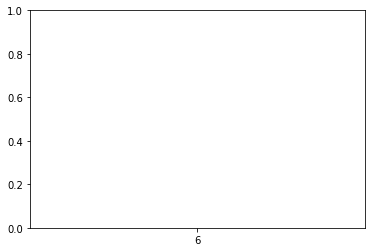

In [ ]:
# Graph 4b: bar Y= closures, x = cuisines
# count of closures by cuisine. Label points.

In [ ]:
# Graph 5: heatmap of inspections per zipcode
# delete entries without inspections or zipcodes

In [1]:
# Graph 6: Bargraph of closures and reclosures by borough
# count closures, count reclosures, group by borough


NameError: name 'final_df' is not defined

In [ ]:
# Graph 6b: heatmap of re/closures by zipcode
# restates graph 6

In [ ]:
# Graph 7: heatmap of critical violations by zipcode or scatterplot by cuisine
# describes which areas or cuisines are the most dangerous, as critical violations led foodborne illness

In [ ]:
# Graph 8: heatmap of grades by zipcode or scatterplot by cuisine
# describes best and worst zipcodes, shows good/bad restaurants by cuisine

In [ ]:
#Graph 9: bargraph showing inspections per year, closures per year
data =  newresults2.dropna(subset=['grade'])


In [ ]:
# Analysis??? Opportunities for Regressions, chi-squares?